In [1031]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Split dataset
from sklearn.model_selection import train_test_split # utils
#K-fold
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_absolute_error # eval metric

# data processing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.path.listdir("../input"))

#K-means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [1032]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [1033]:
df = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')['EpiOrStroma']
df_test = pd.read_csv('X_test.csv')
df.head()

,Mean.Layer.1,Mean.Layer.2,Mean.Layer.3,Standard.deviation.Layer.1,Standard.deviation.Layer.2,Standard.deviation.Layer.3,Skewness.Layer.1,Skewness.Layer.2,Skewness.Layer.3,Ratio.Layer.1,...,GLCM.Mean..quick.8.11..Layer.1..all.dir..,GLCM.StdDev..quick.8.11..Layer.1..all.dir..,GLCM.Correlation..quick.8.11..Layer.1..all.dir..,Number.of.sub.objects.Nucleus..1.,Number.of.sub.objects.Dark..1.,Area.of.sub.objects.Nucleus..1...Pxl.,Area.of.sub.objects.Dark..1...Pxl.,Rel..area.of.sub.objects.Nucleus..1.,Rel..area.of.sub.objects.Dark..1.,Rel..area.of.sub.objects.unclassified..1.
0,125.858498,30.964032,164.498814,43.494697,31.765953,32.182953,0.140945,0.989706,0.584988,0.391690,...,127.135387,44.728844,0.901106,1.0,5.0,136.0,2394.0,0.053755,0.946245,0.000000
1,96.203484,25.650567,142.116917,53.263910,40.001324,45.085541,0.502491,2.187606,0.194728,0.364447,...,98.430668,55.054185,0.900723,8.0,12.0,1947.0,1842.0,0.513856,0.486144,0.000000
2,119.004390,34.141564,162.757202,53.132611,50.290571,38.863597,0.552590,2.202437,0.433075,0.376712,...,119.336739,52.845501,0.937567,3.0,9.0,1139.0,2237.0,0.312483,0.613717,0.073800
3,127.335236,32.264460,170.291857,45.569112,29.347426,32.034223,-0.201071,0.600500,0.048004,0.385991,...,127.952875,46.134400,0.933150,2.0,5.0,1322.0,1306.0,0.503044,0.496956,0.000000
4,179.483106,66.308868,185.935024,41.050604,51.946844,37.133099,-0.273187,0.951550,-0.145970,0.415733,...,179.602240,40.831210,0.893032,5.0,29.0,1779.0,5905.0,0.184946,0.613889,0.201164


# How data looks like

In [920]:
df.describe()

,Mean.Layer.1,Mean.Layer.2,Mean.Layer.3,Standard.deviation.Layer.1,Standard.deviation.Layer.2,Standard.deviation.Layer.3,Skewness.Layer.1,Skewness.Layer.2,Skewness.Layer.3,Ratio.Layer.1,...,GLCM.Mean..quick.8.11..Layer.1..all.dir..,GLCM.StdDev..quick.8.11..Layer.1..all.dir..,GLCM.Correlation..quick.8.11..Layer.1..all.dir..,Number.of.sub.objects.Nucleus..1.,Number.of.sub.objects.Dark..1.,Area.of.sub.objects.Nucleus..1...Pxl.,Area.of.sub.objects.Dark..1...Pxl.,Rel..area.of.sub.objects.Nucleus..1.,Rel..area.of.sub.objects.Dark..1.,Rel..area.of.sub.objects.unclassified..1.
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,182.301111,118.986652,202.973900,38.288443,44.890472,32.093265,-0.791233,0.003329,-0.743671,0.362021,...,181.915703,39.059911,0.879880,4.638333,12.26000,1458.746667,2662.508333,0.149149,0.279623,0.571228
std,36.665231,46.897067,22.244349,10.613177,10.078749,8.007605,0.726370,0.677583,0.628715,0.021620,...,35.470620,10.344066,0.047434,7.289680,16.34935,2377.687823,3778.866498,0.180436,0.265333,0.383937
min,67.388614,25.650567,123.014851,4.077094,11.614268,3.902983,-3.710839,-2.669438,-3.630056,0.311186,...,72.315499,7.677957,0.468423,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.899714,82.373131,186.165918,31.617634,37.890627,27.318182,-1.265568,-0.391474,-1.124787,0.348773,...,151.756543,32.327503,0.865592,0.000000,2.00000,0.000000,353.500000,0.000000,0.041306,0.171538
50%,191.652576,115.394283,204.051131,39.364728,45.226574,32.573667,-0.728627,0.050505,-0.644919,0.356547,...,191.096927,40.138793,0.890547,2.000000,8.00000,586.500000,1392.500000,0.064390,0.197374,0.713799
75%,212.704532,156.620265,220.319194,45.320071,51.513966,37.077982,-0.227479,0.444182,-0.294938,0.367111,...,211.332202,46.046779,0.908176,6.000000,16.00000,1818.250000,3513.000000,0.269940,0.486849,0.934329
max,251.609800,242.569873,252.339383,70.625319,74.427457,56.322197,0.583831,2.202437,0.680190,0.485514,...,250.279081,71.342625,0.948730,56.000000,157.00000,18573.000000,31050.000000,1.000000,1.000000,1.000000


# If there is Nan

In [921]:
df.isna().head()
print("*****In the training set*****")
print(df.isna().sum())
print("\n")
print("*****In the testing set*****")
print(df_test.isna().sum())

*****In the training set*****
Mean.Layer.1                                            0
Mean.Layer.2                                            0
Mean.Layer.3                                            0
Standard.deviation.Layer.1                              0
Standard.deviation.Layer.2                              0
Standard.deviation.Layer.3                              0
Skewness.Layer.1                                        0
Skewness.Layer.2                                        0
Skewness.Layer.3                                        0
Ratio.Layer.1                                           0
Ratio.Layer.2                                           0
Ratio.Layer.3                                           0
Min..pixel.value.Layer.1                                0
Min..pixel.value.Layer.2                                0
Min..pixel.value.Layer.3                                0
Max..pixel.value.Layer.1                                0
Max..pixel.value.Layer.2                  

# Check the distribution of each variable

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


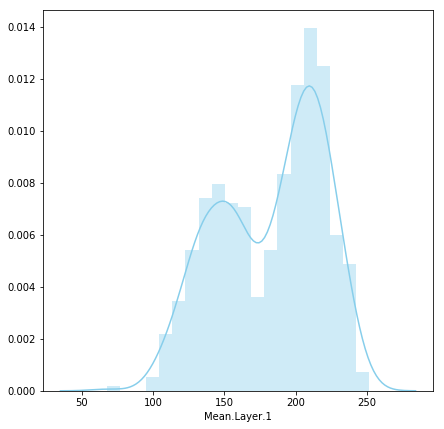

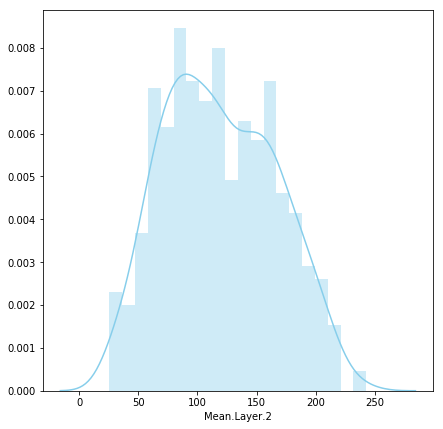

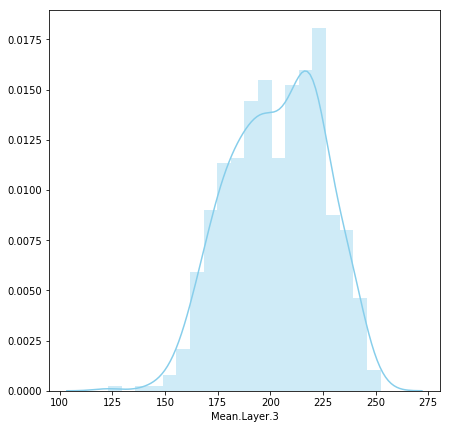

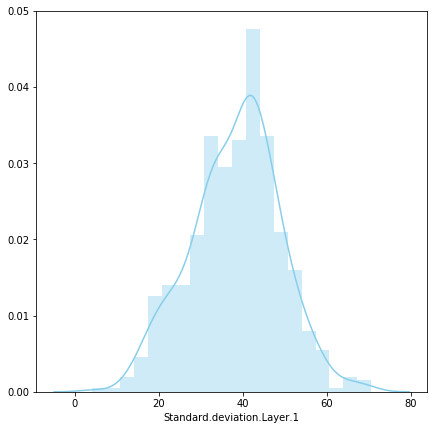

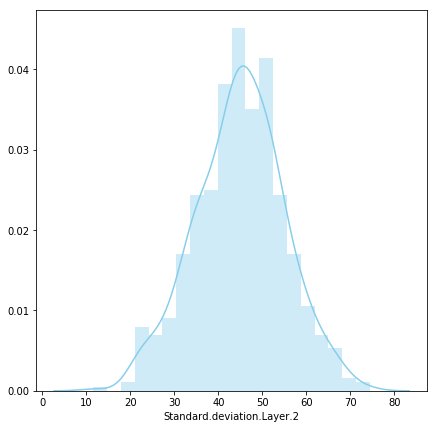

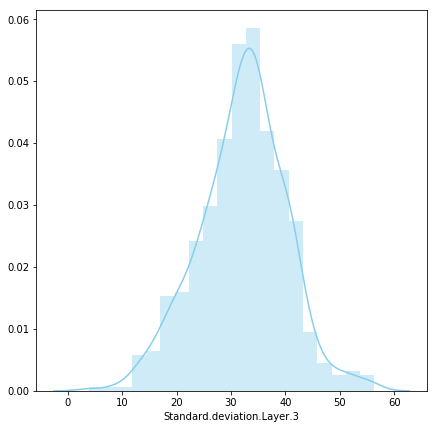

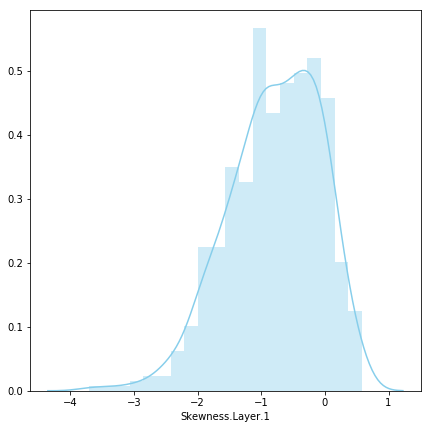

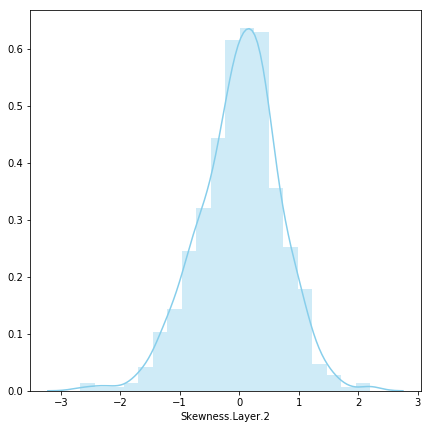

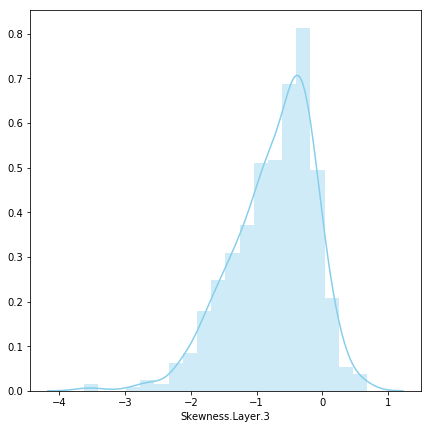

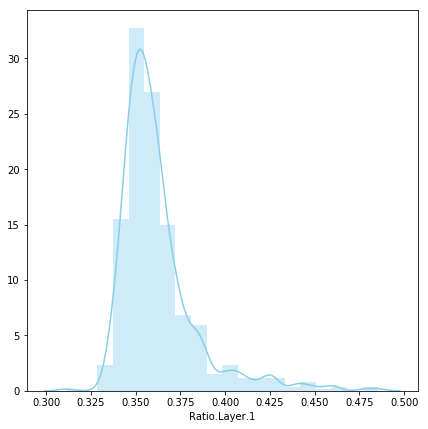

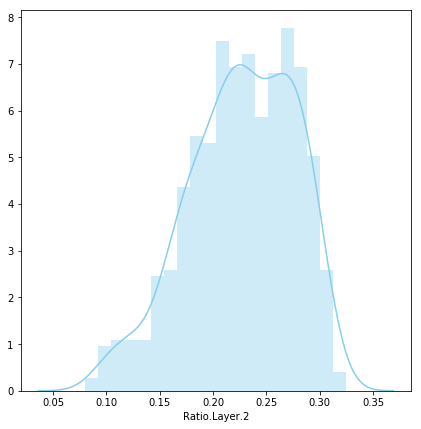

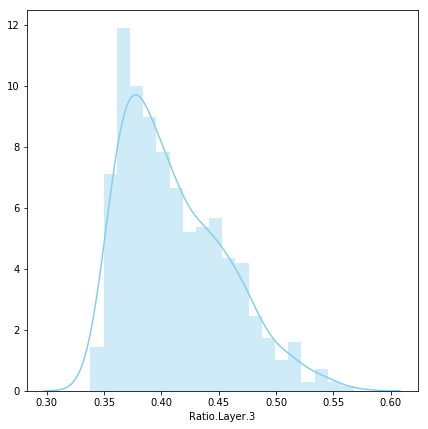

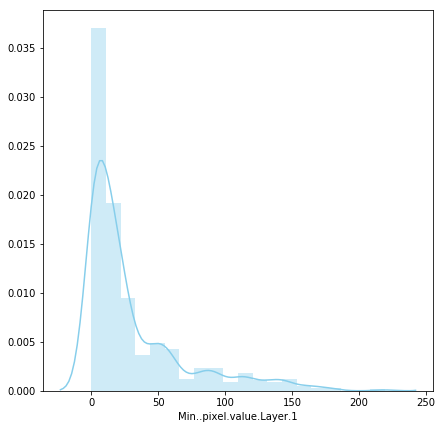

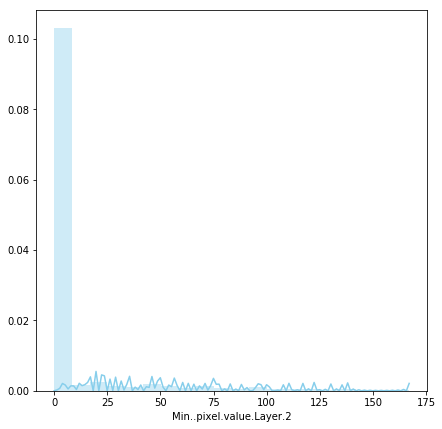

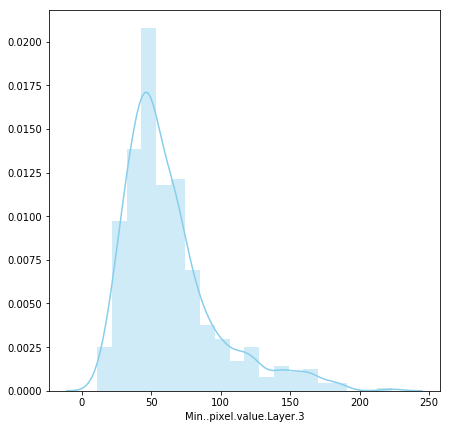

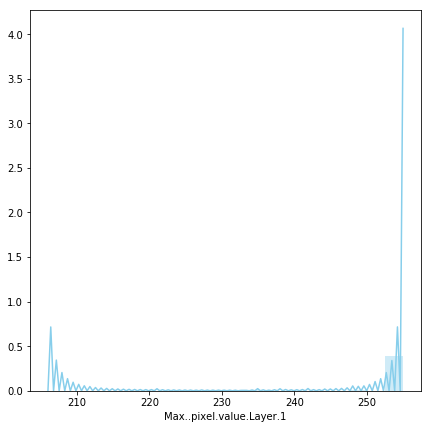

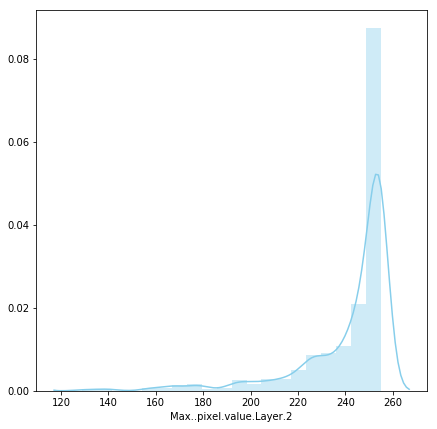

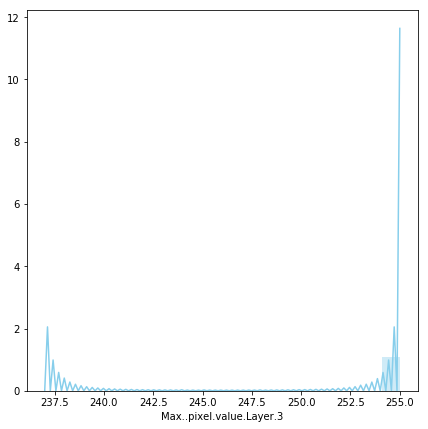

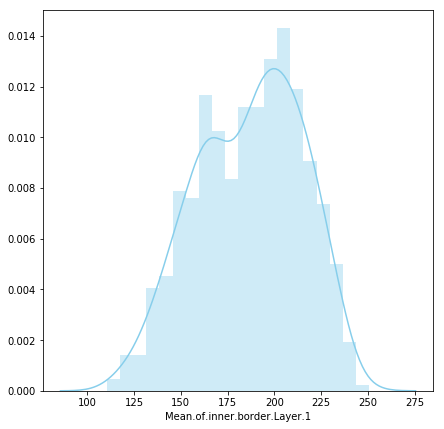

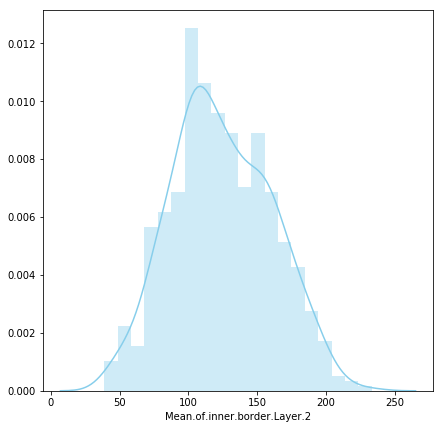

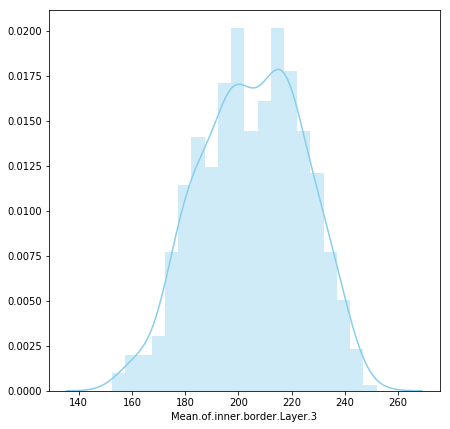

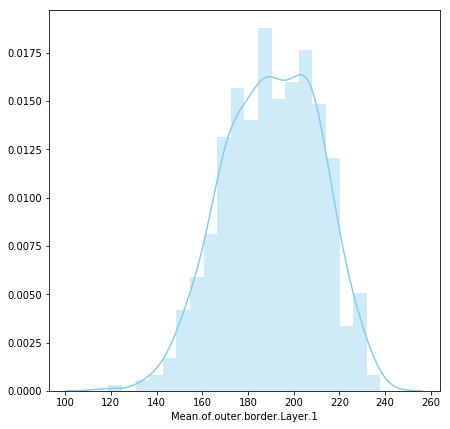

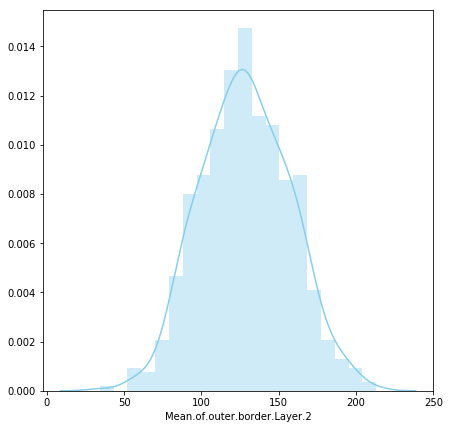

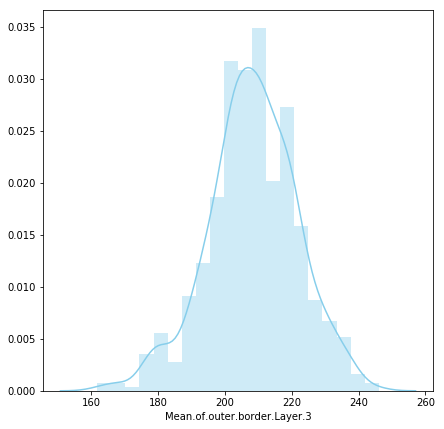

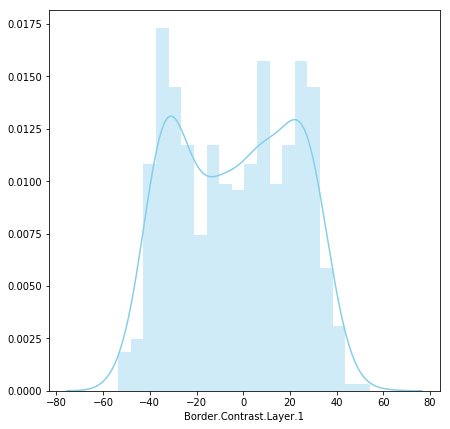

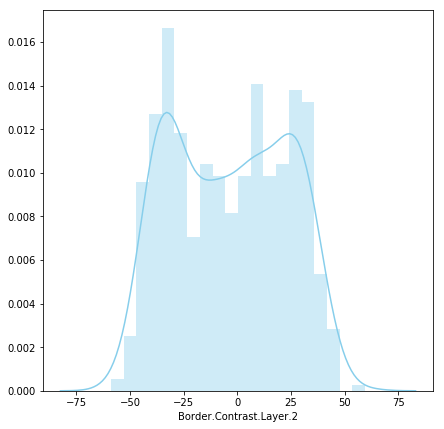

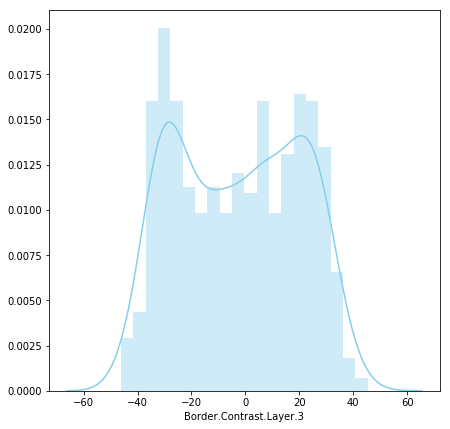

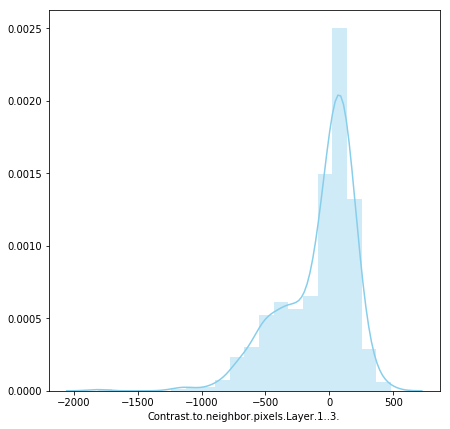

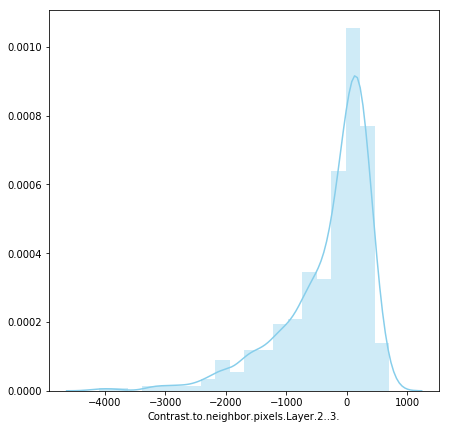

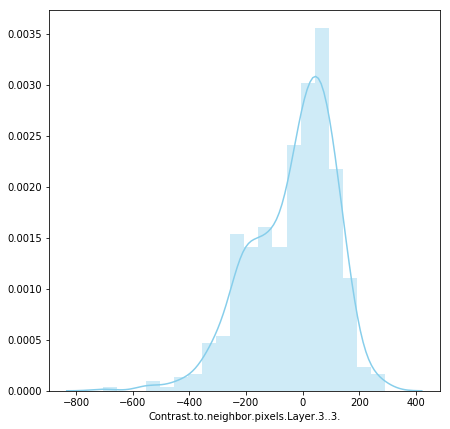

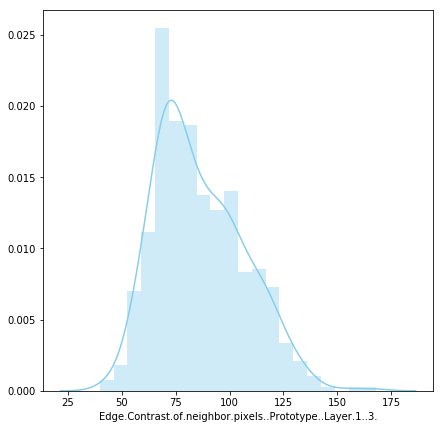

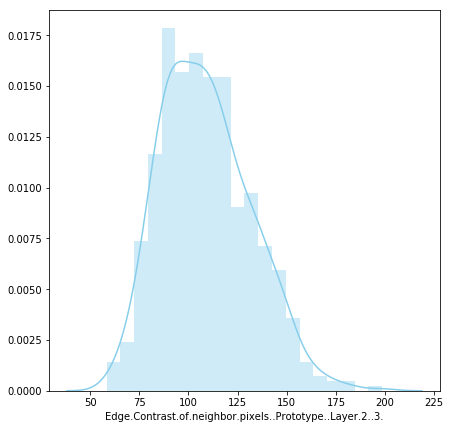

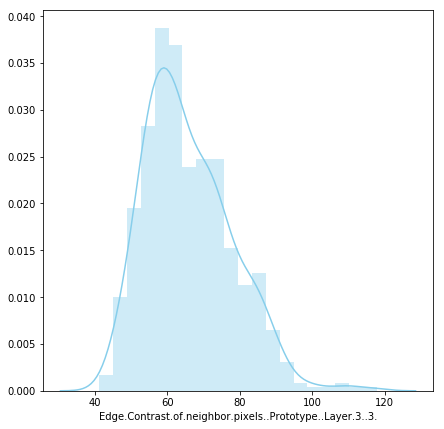

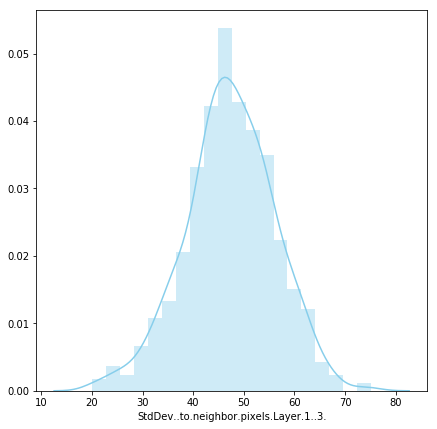

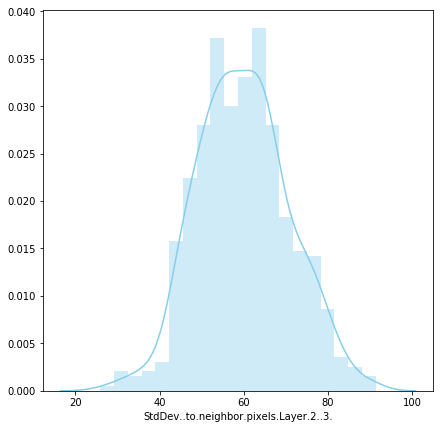

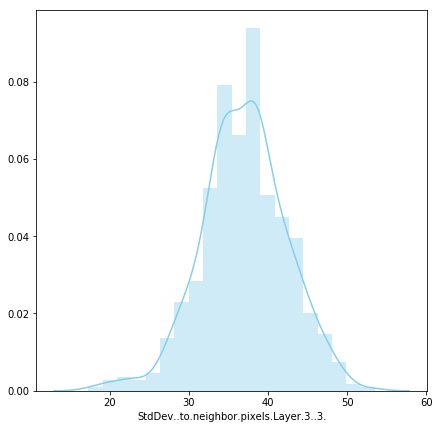

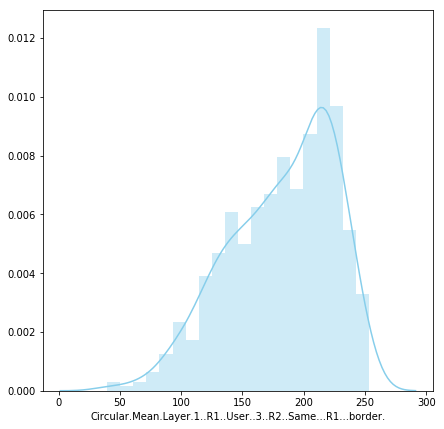

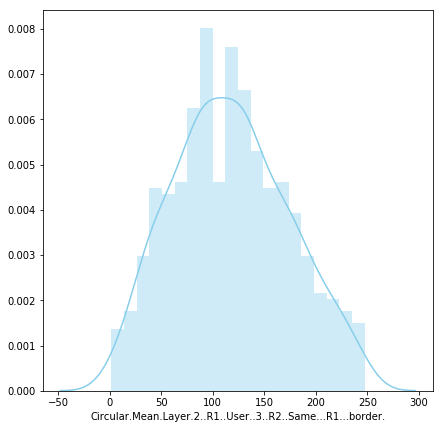

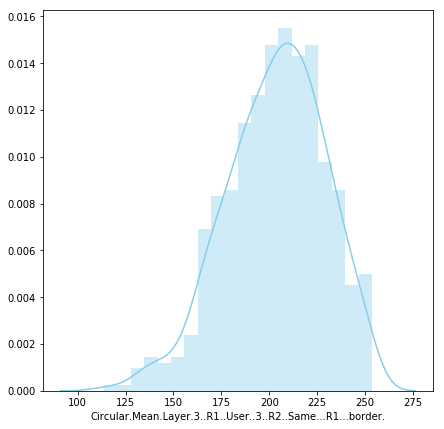

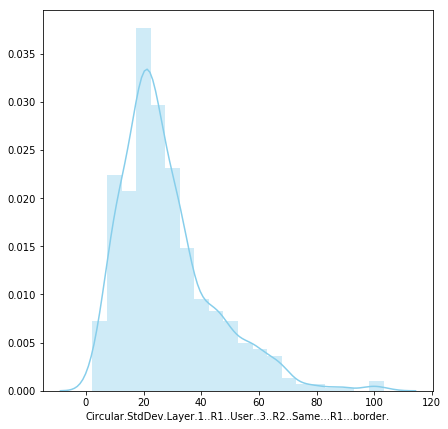

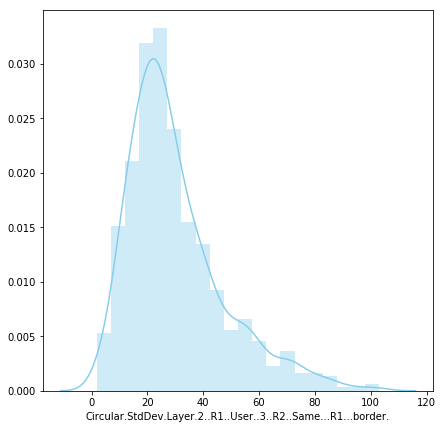

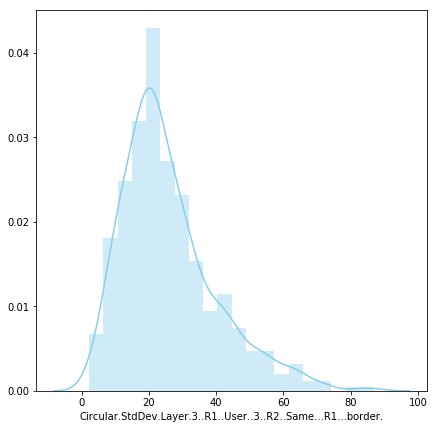

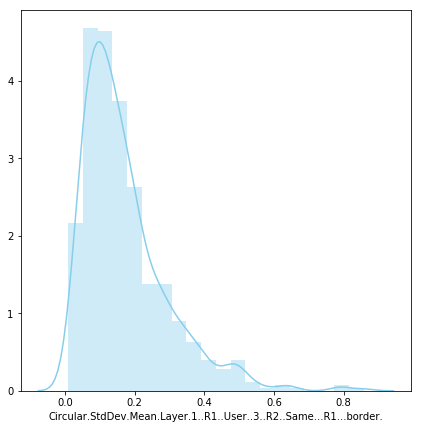

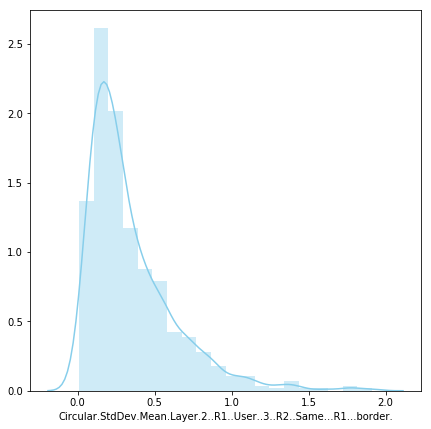

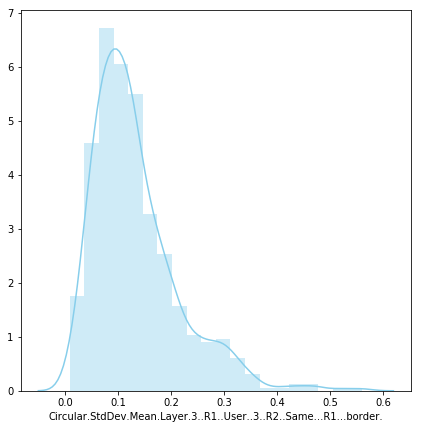

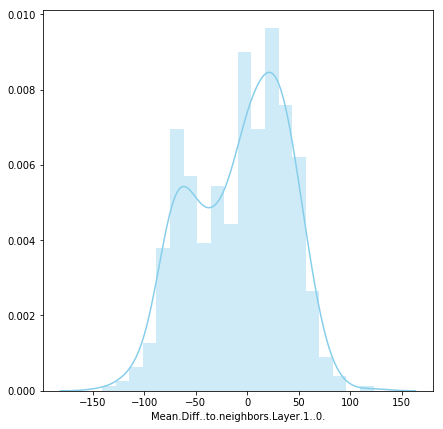

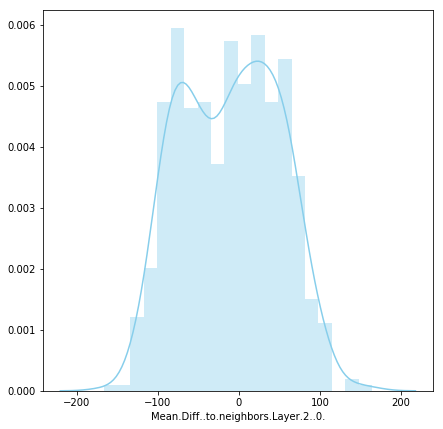

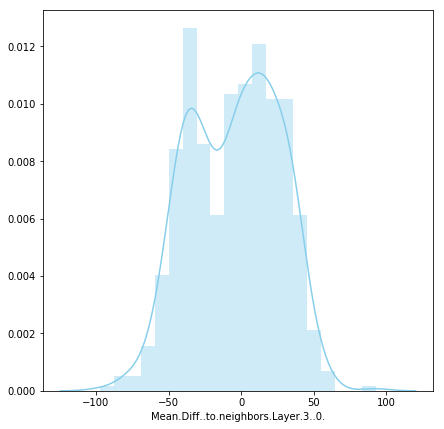

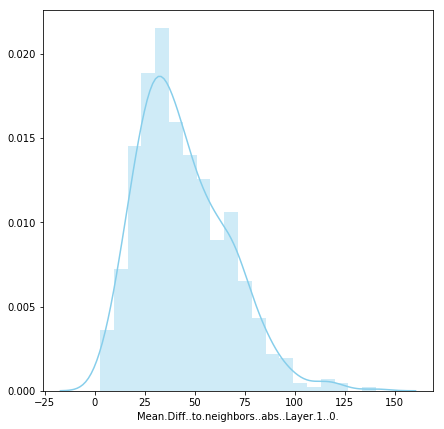

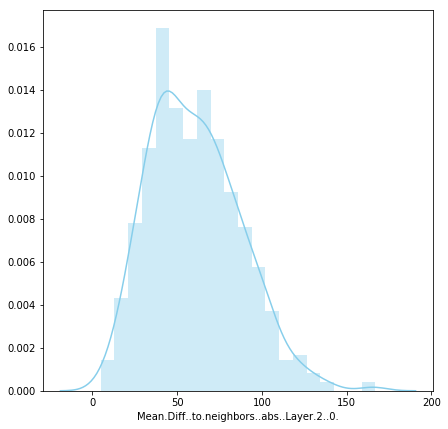

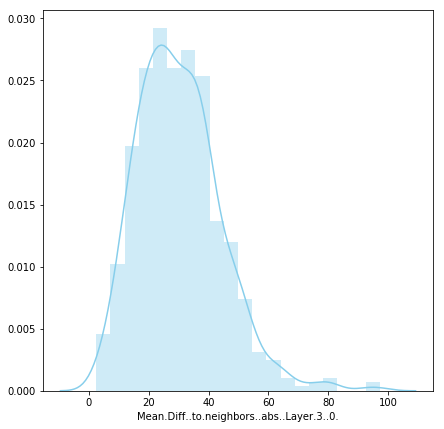

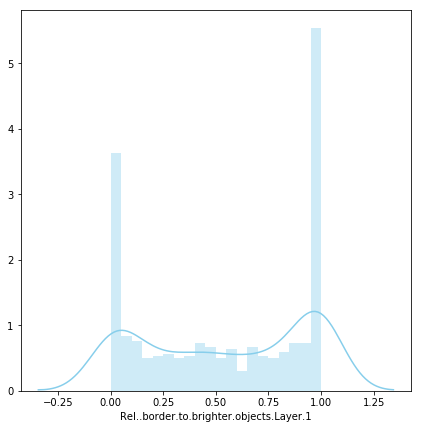

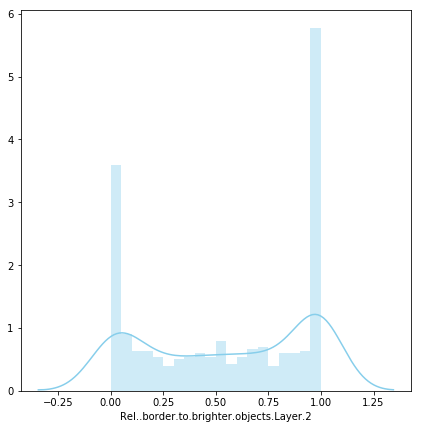

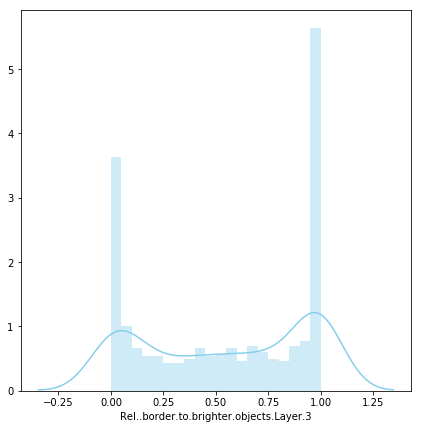

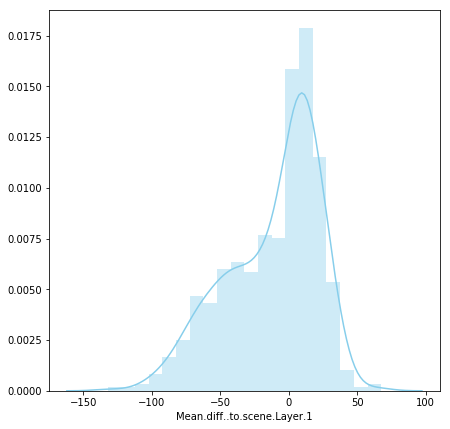

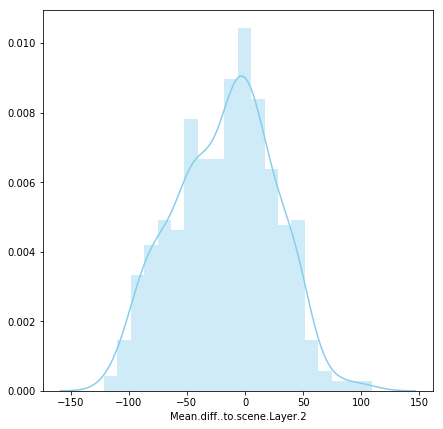

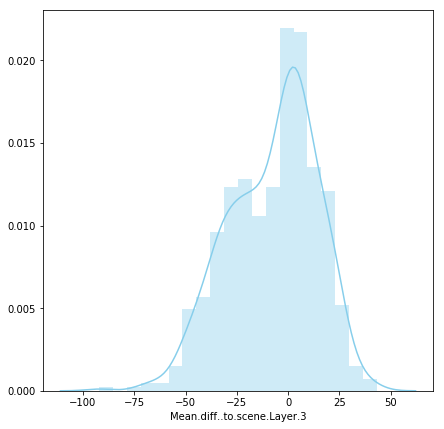

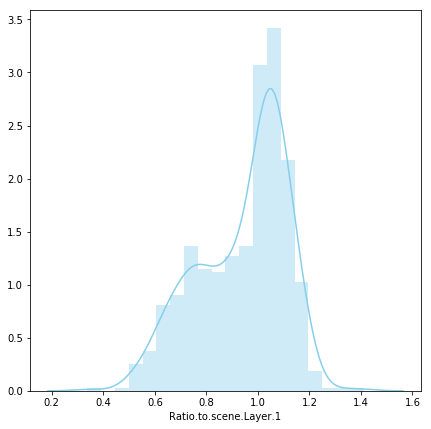

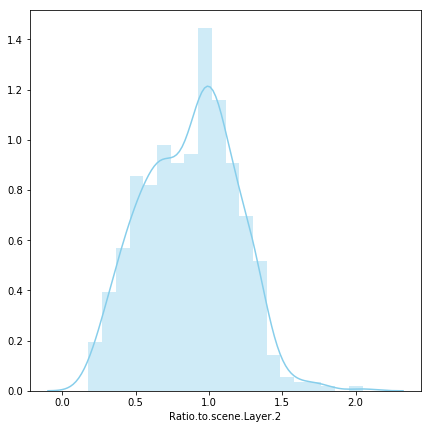

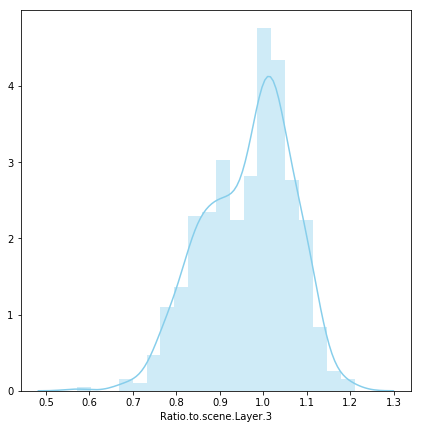

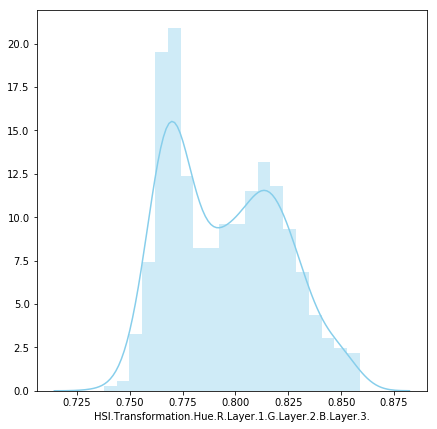

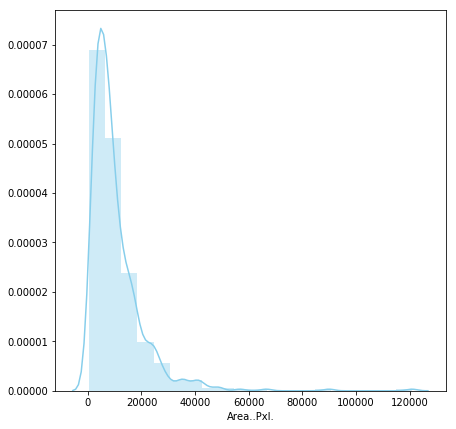

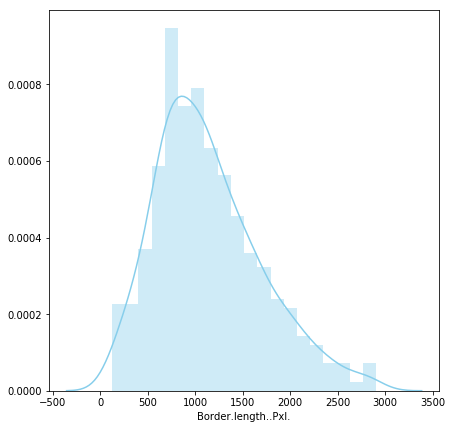

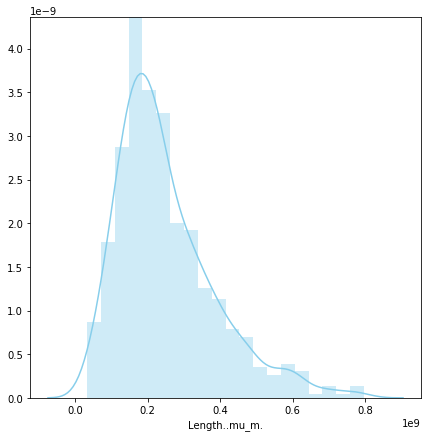

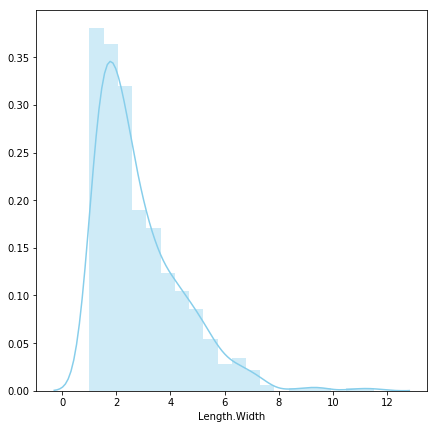

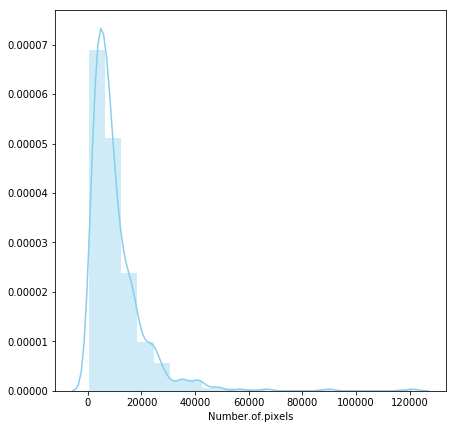

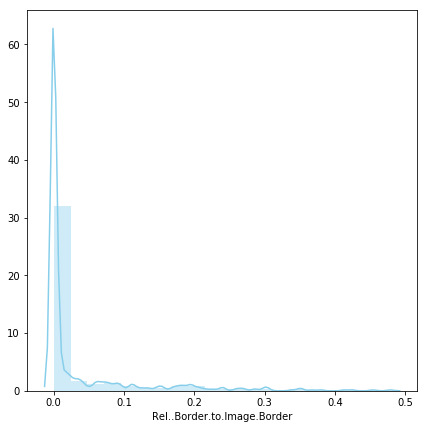

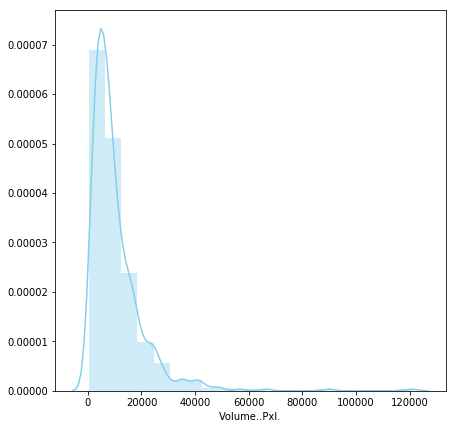

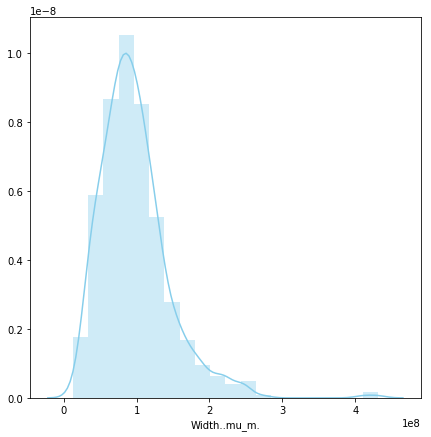

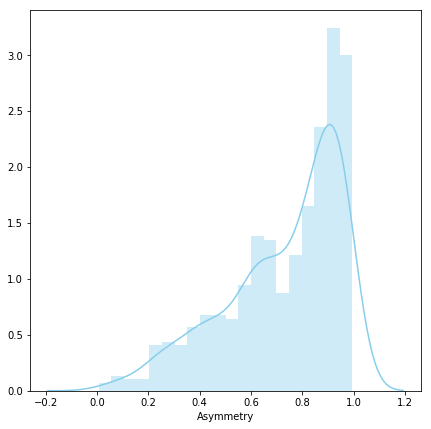

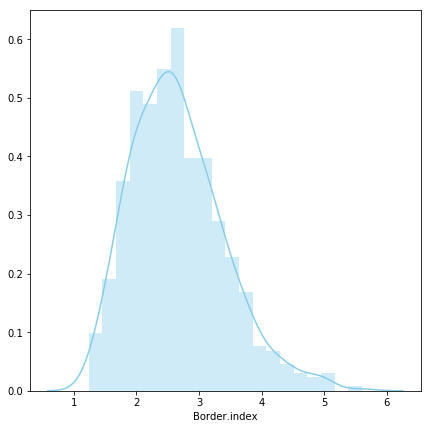

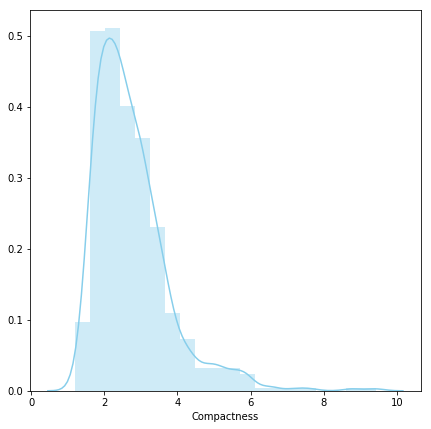

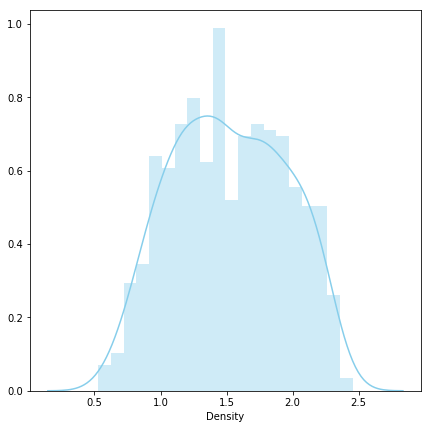

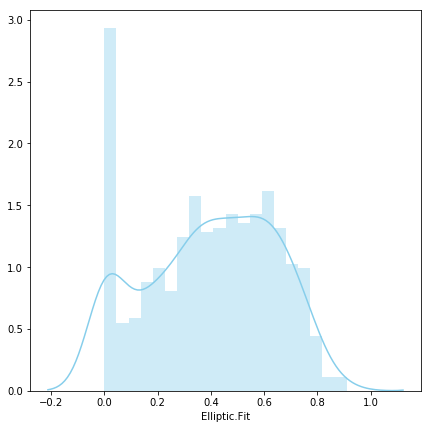

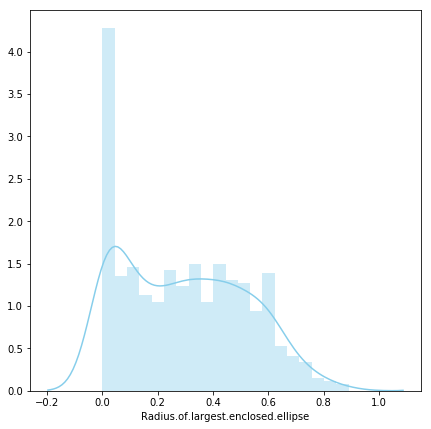

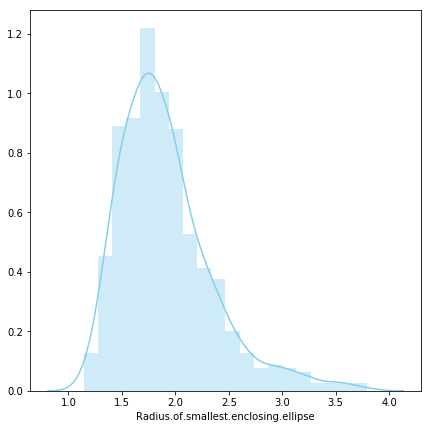

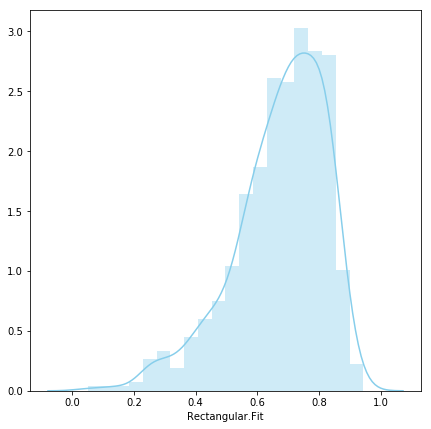

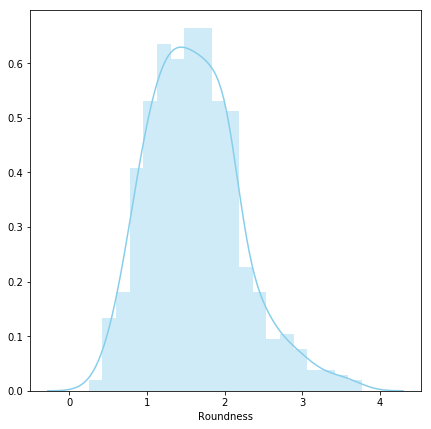

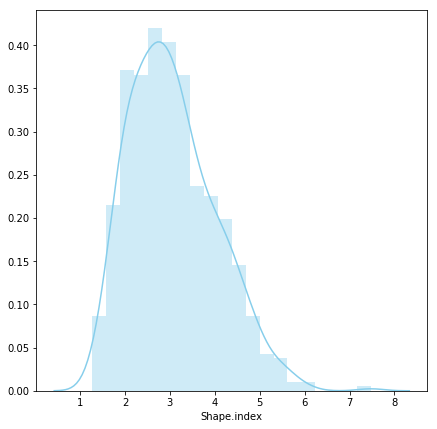

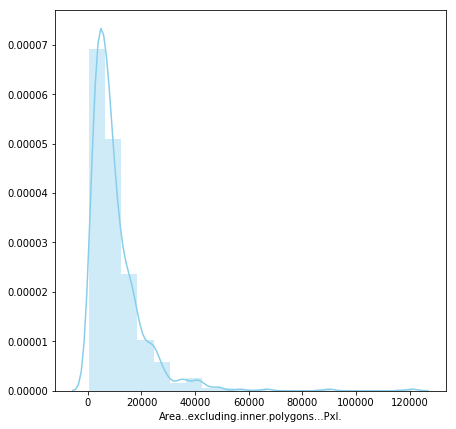

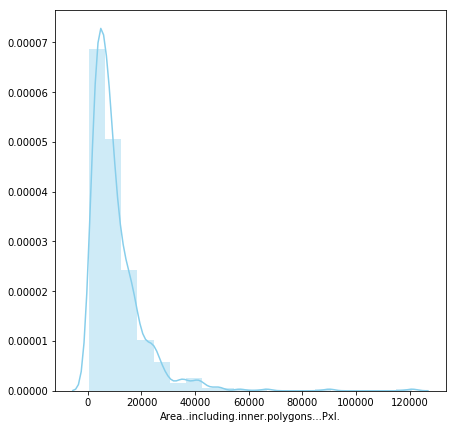

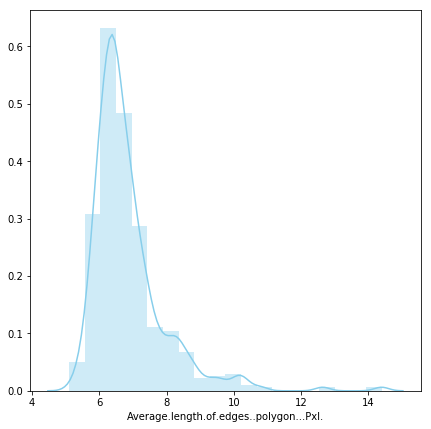

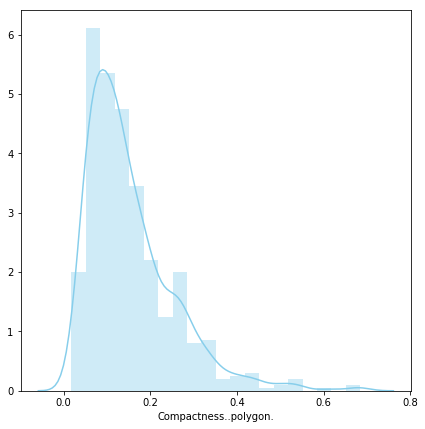

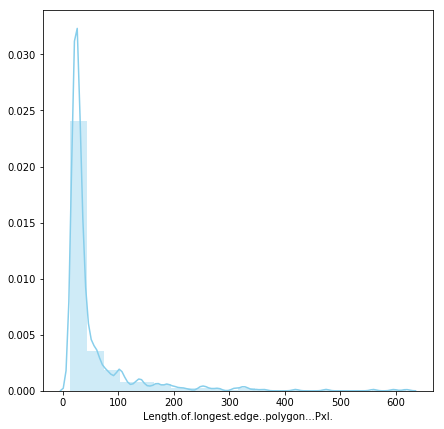

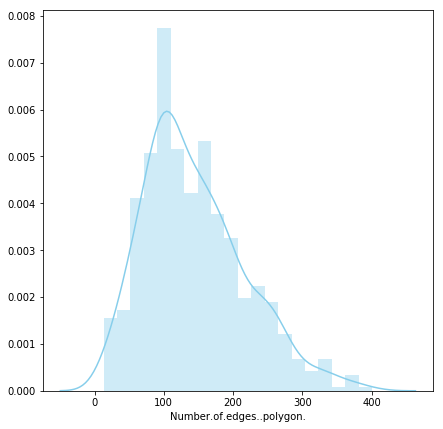

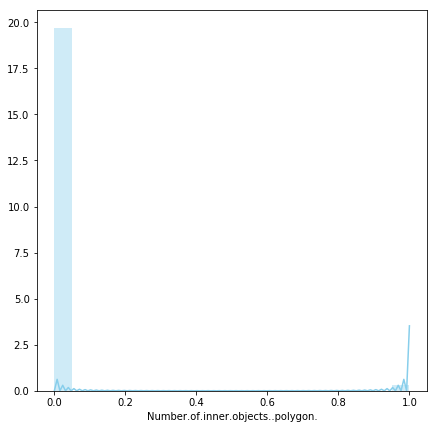

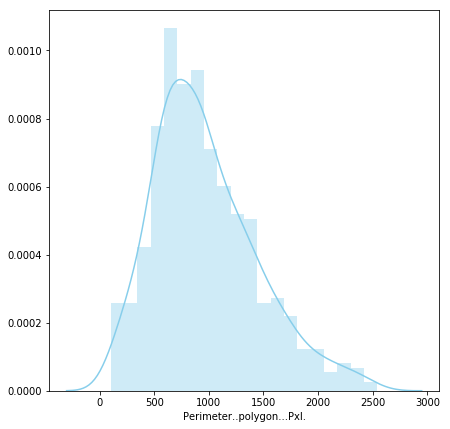

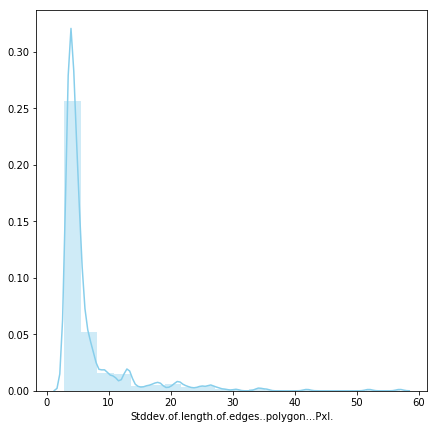

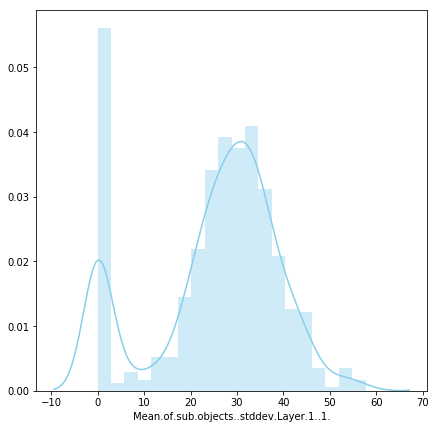

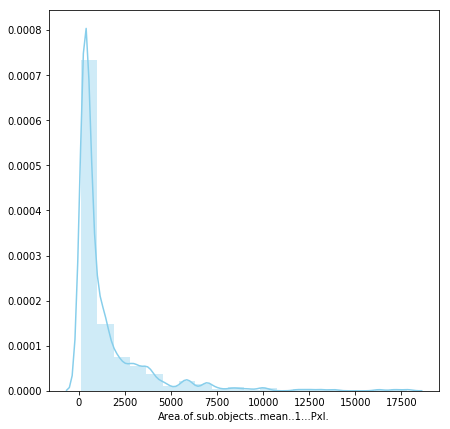

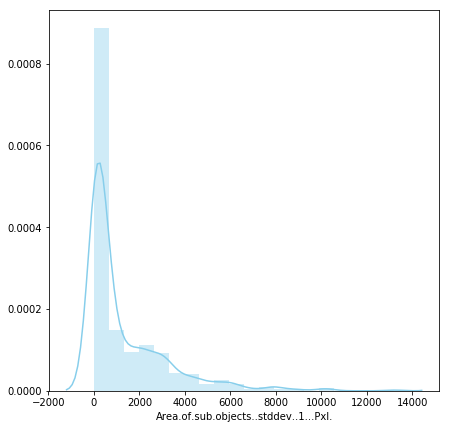

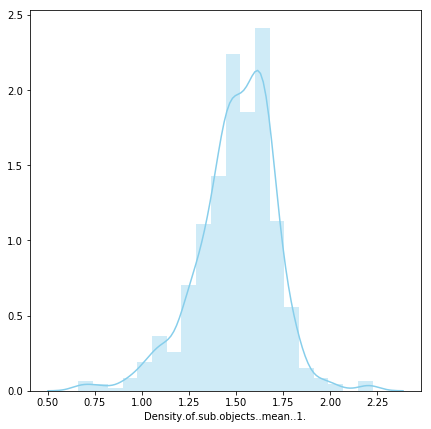

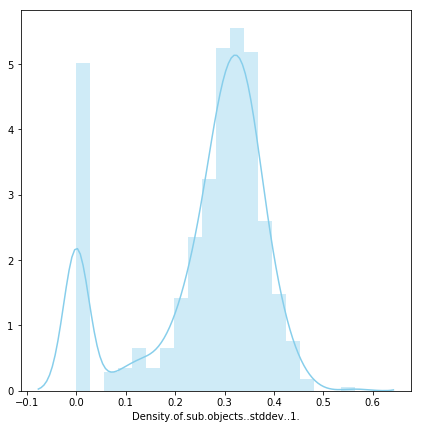

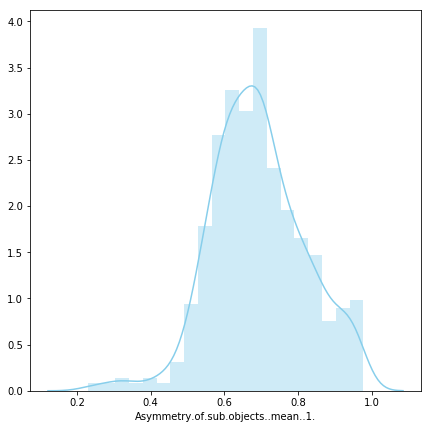

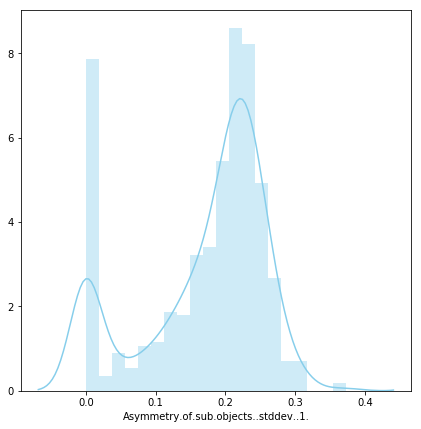

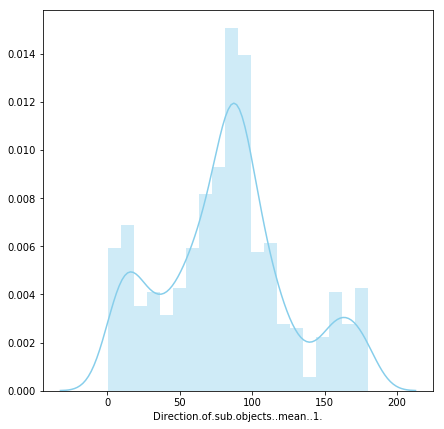

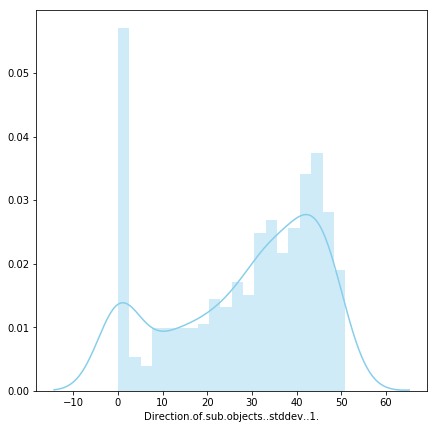

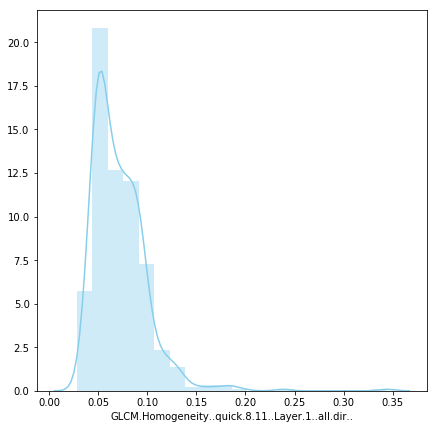

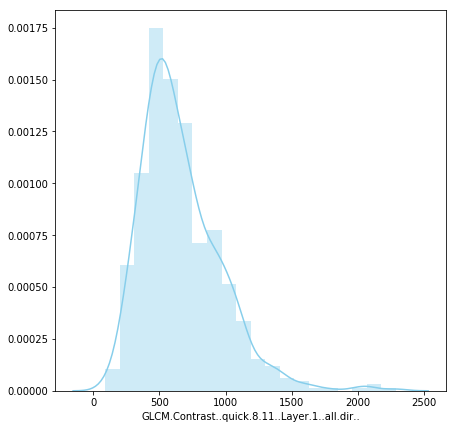

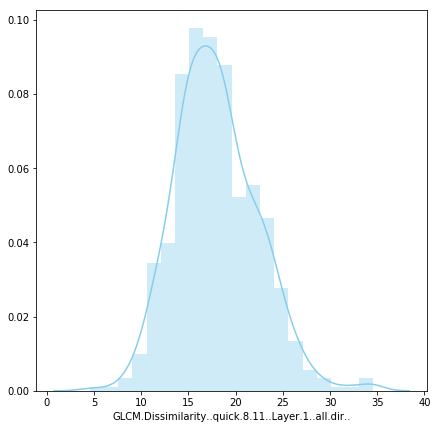

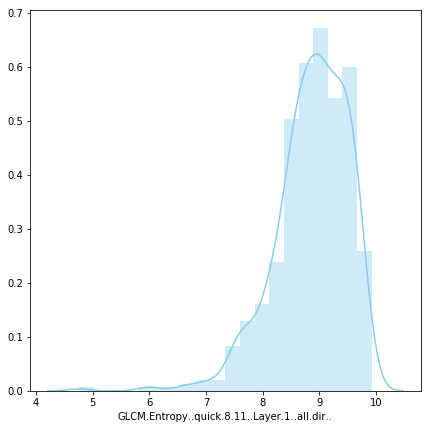

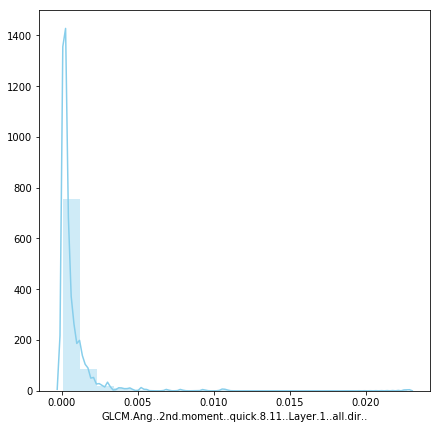

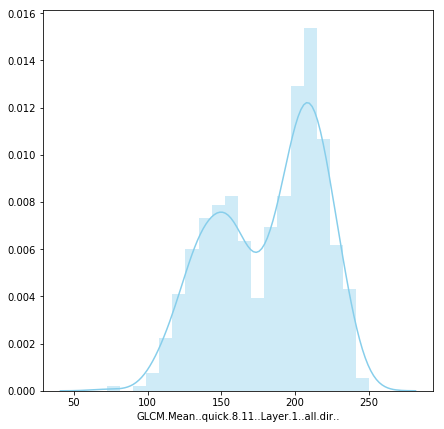

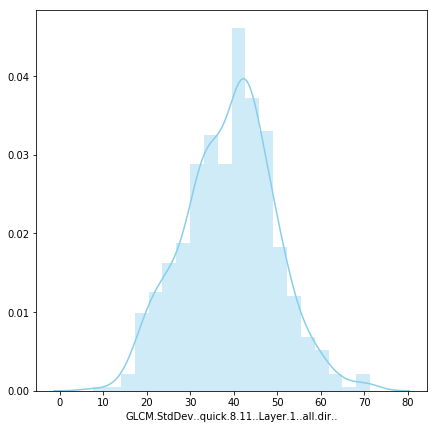

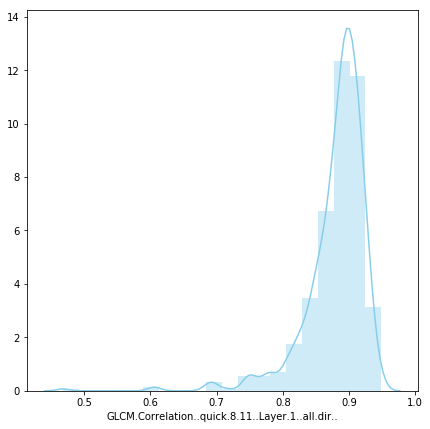

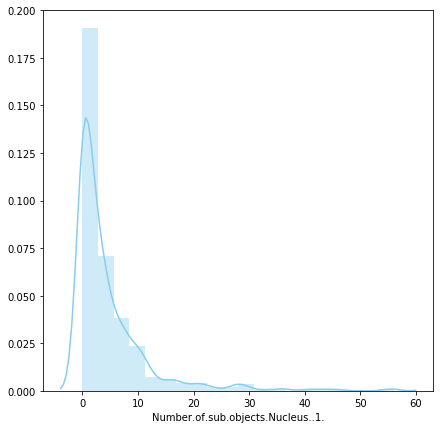

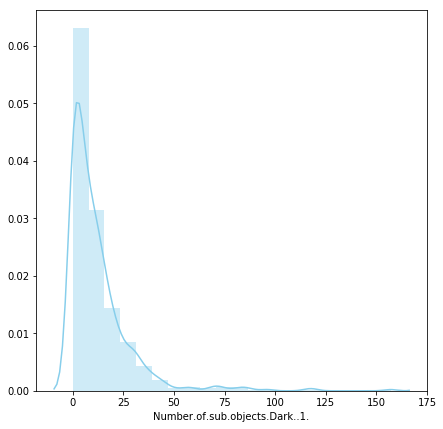

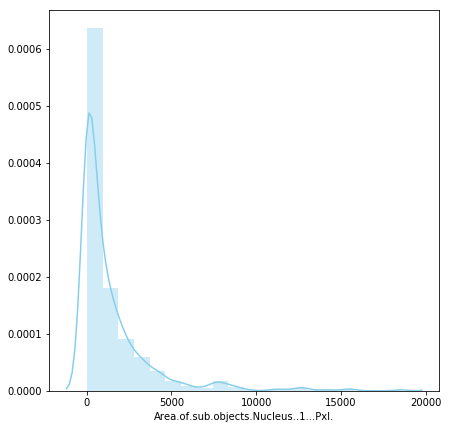

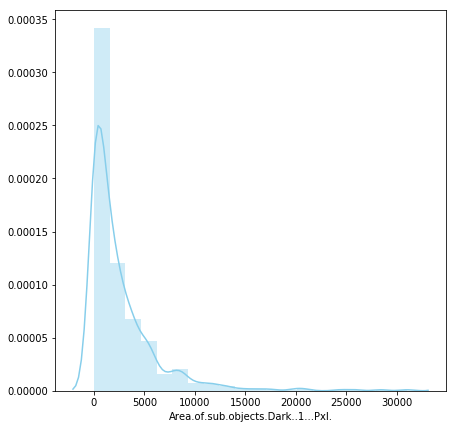

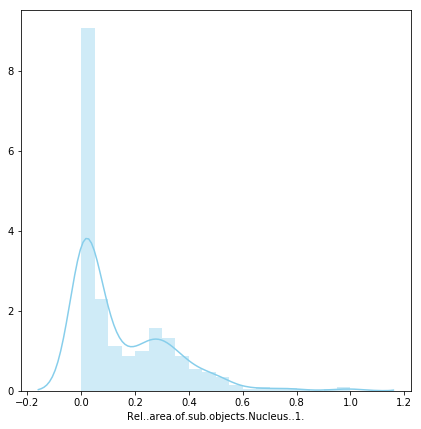

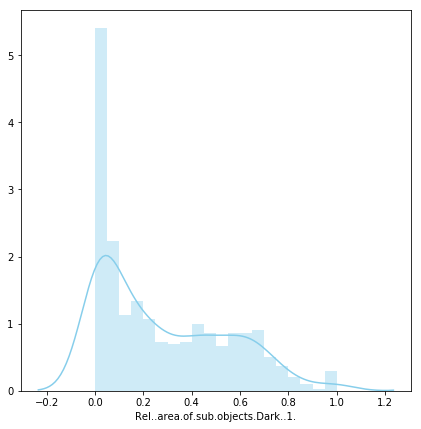

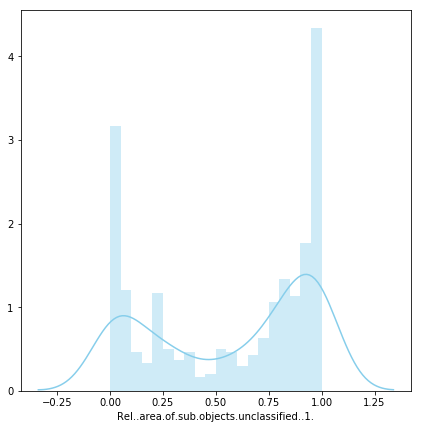

In [1034]:
for i in range(len(df_data[0,:])):
    f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
    sns.distplot( df_data[:,i],bins=20,axlabel=df.columns.values[i],color="skyblue", ax=axes)
    sns_plot.figure.savefig(fname=df.columns.values[i]+'.png')

# Cross validation (Split dataset with 10% testing data)

In [1035]:
# split the data
X, y = df.values, y.values
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.1, random_state=1)
print('train shape:', X_train.shape, 'validation shape:', X_val.shape)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

train shape: (540, 112) validation shape: (60, 112)
(540, 112)
(60, 112)
(540,)
(60,)


In [1093]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', GaussianNB()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', GaussianNB(priors=None, var_smoothing=1e-09))]

In [1109]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pipeline, X_train, y_train)
scores

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00199461, 0.00199461, 0.00199389]),
 'score_time': array([0.0009973, 0.0009973, 0.0009985]),
 'test_score': array([0.8839779 , 0.86111111, 0.89944134]),
 'train_score': array([0.88857939, 0.88611111, 0.88088643])}

In [1110]:
scores['test_score'].mean()

0.8815101174819068

In [1111]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=2))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(GaussianNB(priors= [0.5, 0.5]))


for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should s

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.009639898935953775
fit_time  std  0.001243220603462918
score_time  mean  0.0009979406992594402
score_time  std  2.247831920581015e-07
test_score  mean  0.90930881497257
test_score  std  0.010998840646268751
train_score  mean  0.9694545754096754
train_score  std  0.004466830919547212
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.010964075724283854
fit_time  std  0.0008

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
-----------------------------------
fit_time  mean  0.017285982767740887
fit_time  std  0.002859843125616697
score_time  mean  0.0003329912821451823
score_time  std  0.0004709207873617226
test_score  mean  0.9018499084905457
test_score  std  0.005253950343594476
train_score  mean  1.0
train_score  std  0.0
---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [1112]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= GaussianNB(priors= [0.5, 0.5]))
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]

In [1098]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    #'clf__priors' : [0.5, 0.5],
})

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
cv_grid.fit(X_train, y_train)

In [1099]:
cv_grid.best_params_

{}

In [1100]:
cv_grid.best_estimator_

Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))])

In [1101]:
cv_grid.best_score_

0.8814814814814815

In [1083]:
df.shape
df_test.shape
#y.shape

(1596, 112)

In [1084]:
y_predict = cv_grid.predict(X_val)
accuracy = accuracy_score(y_val,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 90.000%


In [1085]:
cv_grid.fit(df,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1086]:
y_predict = cv_grid.predict(df_test)
y_predict.shape
#accuracy = accuracy_score(y,y_predict)
#print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

(1596,)

# Submission for original dataset

In [1071]:
y_predict = cv_grid.predict(df_test)
y_predict
df_sub = pd.DataFrame({'Id': np.arange(y_predict.size), 'EpiOrStroma': y_predict})
df_sub.to_csv('submission_BBBB.csv', index=False)

# We then try to apply specific variables as our new datasets

# Setting new dataset

In [1145]:
X = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:, 1]

In [1130]:
list=[0,6,11,18,27,54,57,60,102,109,111]
xtrainin = np.zeros((600,len(list)))
xtestin = np.zeros((1596,len(list)))
for j in range(len(list)):
    xtrainin[:,j] = X[:,list[j]]
    xtestin[:,j] = X_test[:,list[j]]

In [1146]:
#This dataset has better performance
list1 = [17,40,41,65,66,67,68,79,80,81,83,85,87]

xtrainin = np.zeros((600,112-len(list1)))
xtestin = np.zeros((1596,112-len(list1)))

k = 0

for j in range(112):
    if j not in list1:
        xtrainin[:,k] = X[:,j]
        xtestin[:,k] = X_test[:,j]
        k += 1

In [1147]:
X_train, X_val, y_train, y_val = train_test_split(xtrainin, y, test_size=0.1, random_state=1)
print('train shape:', X_train.shape, 'validation shape:', X_val.shape)

train shape: (540, 99) validation shape: (60, 99)


In [1148]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', GaussianNB()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', GaussianNB(priors=None, var_smoothing=1e-09))]

In [1149]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pipeline, X_train, y_train)
scores

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00797796, 0.00399113, 0.00299525]),
 'score_time': array([0.00130463, 0.        , 0.0009985 ]),
 'test_score': array([0.8839779 , 0.86111111, 0.89944134]),
 'train_score': array([0.88857939, 0.88611111, 0.88365651])}

In [1150]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=2))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(GaussianNB(priors= [0.5, 0.5]))


for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should s

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.013739347457885742
fit_time  std  0.0018324020121845144
score_time  mean  0.0008501211802164713
score_time  std  0.0006477455699070586
test_score  mean  0.90930881497257
test_score  std  0.010998840646268751
train_score  mean  0.9694545754096754
train_score  std  0.004466830919547212
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.02228061358133952
fit_time  std  0.0027

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----------------------------------
fit_time  mean  0.03866434097290039
fit_time  std  0.003987924273680607
score_time  mean  0.0028777122497558594
score_time  std  0.0001343162335356584
test_score  mean  0.9037326826502419
test_score  std  0.009162366535309779
train_score  mean  0.9981481338590577
train_score  std  0.0013094822618917269
---------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [1151]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= GaussianNB(priors= [0.5, 0.5]))
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]

In [1152]:
cv_grid.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1153]:
y_predict = cv_grid.predict(X_val)
accuracy = accuracy_score(y_val,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 90.000%


In [1154]:
cv_grid.fit(xtrainin, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1155]:
y_predict = cv_grid.predict(xtestin)

# Submission for new dataset

In [1156]:
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] =y_predict
np.savetxt('my_submissionBBBBBB.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")